In [50]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [51]:
# Parámetros iniciales.
stocks = ["HPQ", "INTC", "JNJ", "JPM", "KO", "PFE", "PG", "PYPL", "TSLA", "XOM"]
start_date = "2015-08-01"
end_date = "2022-12-31"
risk_free_ticker = "^IRX"
num_assets = len(stocks)
numberSim = 25000

In [52]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
print(prices_df.head())

[*********************100%***********************]  10 of 10 completed
                  HPQ       INTC        JNJ        JPM         KO        PFE  \
Date                                                                           
2015-08-03  10.682040  23.165543  81.248138  55.055363  32.416645  25.854351   
2015-08-04  10.589523  23.229332  81.069450  54.999123  32.658554  25.825743   
2015-08-05  10.781672  23.414265  81.654320  55.216045  32.869251  25.818537   
2015-08-06  10.724740  23.325815  80.476448  54.830437  32.713181  25.350029   
2015-08-07  10.464983  23.221294  80.297729  54.669758  32.596119  25.364439   

                   PG       PYPL       TSLA        XOM  
Date                                                    
2015-08-03  61.268635  39.389999  17.332666  54.431667  
2015-08-04  60.875687  38.950001  17.752001  53.811058  
2015-08-05  60.763412  39.270000  18.008667  53.811058  
2015-08-06  60.739338  38.849998  16.408667  54.452591  
2015-08-07  60.530819  39.

In [53]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).info["regularMarketPreviousClose"]
risk_free /= 100
print(risk_free)

0.048650002


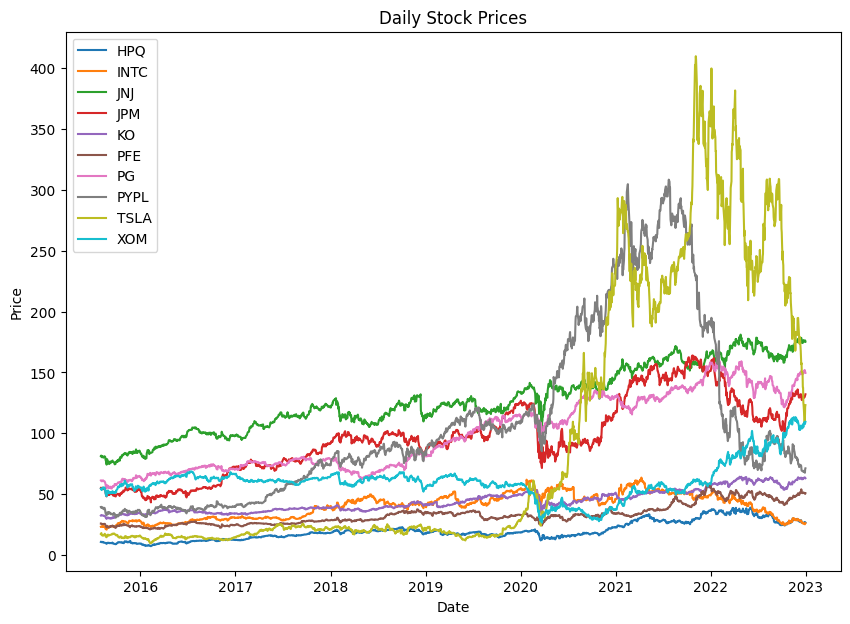

In [54]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [55]:
# Retornos diarios (Comando directo)
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

                 HPQ      INTC       JNJ       JPM        KO       PFE  \
Date                                                                     
2015-08-04 -0.008661  0.002754 -0.002199 -0.001022  0.007462 -0.001107   
2015-08-05  0.018145  0.007961  0.007214  0.003944  0.006452 -0.000279   
2015-08-06 -0.005280 -0.003778 -0.014425 -0.006984 -0.004748 -0.018146   
2015-08-07 -0.024220 -0.004481 -0.002221 -0.002930 -0.003578  0.000568   
2015-08-10  0.028222  0.026316  0.009510  0.012344 -0.002154  0.004831   

                  PG      PYPL      TSLA       XOM  
Date                                                
2015-08-04 -0.006414 -0.011170  0.024193 -0.011402  
2015-08-05 -0.001844  0.008216  0.014458  0.000000  
2015-08-06 -0.000396 -0.010695 -0.088846  0.011922  
2015-08-07 -0.003433  0.007207 -0.014708 -0.016135  
2015-08-10  0.011924 -0.002045 -0.005649  0.024990  
[0.00075056 0.0002862  0.00048275 0.00063668 0.00043022 0.00047315
 0.00055447 0.00061625 0.00171973 0.0005489

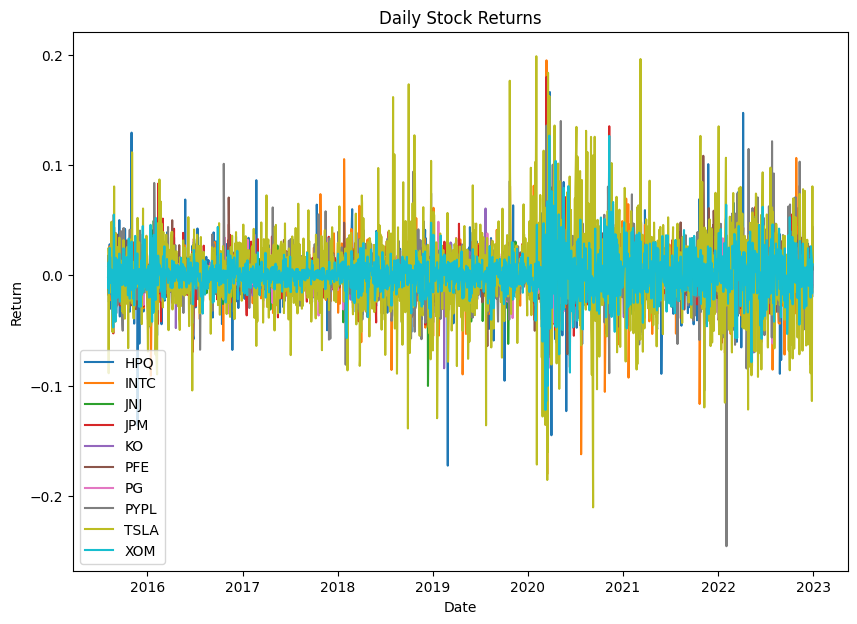

In [56]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [57]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

            HPQ      INTC       JNJ       JPM        KO       PFE        PG  \
0      0.118004  0.022992  0.064371  0.081137  0.153541  0.182618  0.079725   
1      0.092286  0.072850  0.220060  0.096672  0.120644  0.066238  0.062841   
2      0.128255  0.095725  0.130676  0.142072  0.092026  0.128890  0.106615   
3      0.140506  0.031264  0.138698  0.096865  0.128166  0.107753  0.113611   
4      0.130877  0.073905  0.185781  0.192476  0.045952  0.062233  0.039590   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.123213  0.131671  0.026962  0.134579  0.106027  0.027472  0.161541   
24996  0.057996  0.085447  0.165222  0.231088  0.010279  0.193280  0.110763   
24997  0.029974  0.135650  0.173059  0.136877  0.018850  0.043180  0.032845   
24998  0.034400  0.105177  0.112241  0.158819  0.181750  0.088156  0.003710   
24999  0.178766  0.103214  0.001974  0.130776  0.179835  0.156982  0.024771   

           PYPL      TSLA       XOM  
0      0.1938

In [58]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [59]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(252)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*252)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [60]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.162930  0.194060      0.588889
1      0.182528  0.198964      0.672875
2      0.164732  0.190778      0.608469
3      0.190416  0.196287      0.722237
4      0.163360  0.200400      0.572403
...         ...       ...           ...
24995  0.179874  0.214272      0.612416
24996  0.178496  0.195138      0.665410
24997  0.193105  0.220243      0.655891
24998  0.197405  0.212509      0.699995
24999  0.174689  0.211062      0.597167

[25000 rows x 3 columns]


In [61]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

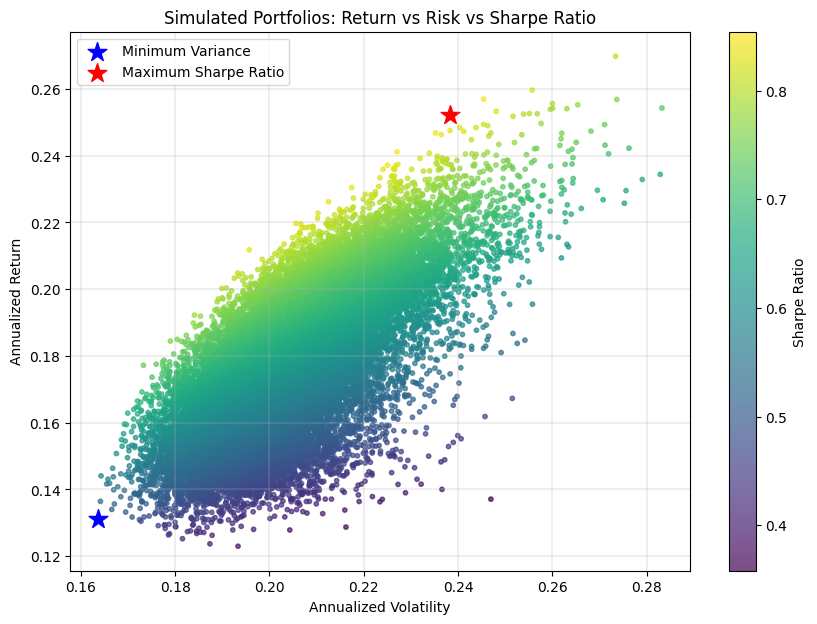

In [62]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [63]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 13.1
Annualized Risk: 16.37
Sharpe Ratio: 0.5


            HPQ  INTC   JNJ   JPM     KO    PFE    PG  PYPL  TSLA   XOM
Allocation  0.1  6.61  10.8  1.77  28.73  19.22  21.8  3.43  0.66  6.88
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 25.21
Annualized Risk: 23.82
Sharpe Ratio: 0.85


              HPQ  INTC    JNJ   JPM    KO   PFE     PG  PYPL   TSLA   XOM
Allocation  15.27  0.46  23.14  3.18  2.56  7.62  11.68  1.96  28.49  5.63
--------------------------------------------------------------------------------


In [64]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [77]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, 0.3, 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

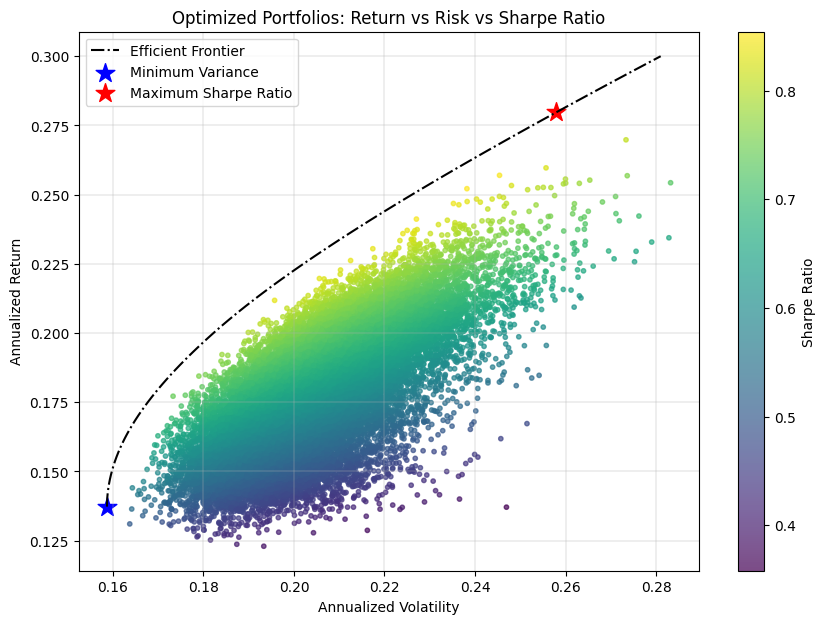

In [78]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [81]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 2) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 13.73
Annualized Risk: 15.87
Sharpe Ratio: 0.56


            HPQ  INTC    JNJ  JPM     KO    PFE     PG  PYPL  TSLA  XOM
Allocation  0.0   0.0  30.44  0.0  25.86  11.36  22.55  1.58  1.61  6.6
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 27.98
Annualized Risk: 25.8
Sharpe Ratio: 0.9


             HPQ  INTC   JNJ   JPM   KO  PFE     PG  PYPL   TSLA   XOM
Allocation  7.24   0.0  9.03  3.16  0.0  0.0  44.37   0.0  35.58  0.61
--------------------------------------------------------------------------------


In [82]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(252)-1
stocks_risk = np.std(returns_df)*np.sqrt(252)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})


print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                     HPQ   INTC    JNJ    JPM     KO    PFE     PG   PYPL  \
Annualized Return  20.81   7.48  12.93  17.40  11.45  12.66  14.99  16.79   
Annualized Risk    36.13  33.34  18.83  29.12  19.14  23.75  19.58  38.67   

                    TSLA    XOM  
Annualized Return  54.19  14.83  
Annualized Risk    58.11  29.67  
--------------------------------------------------------------------------------


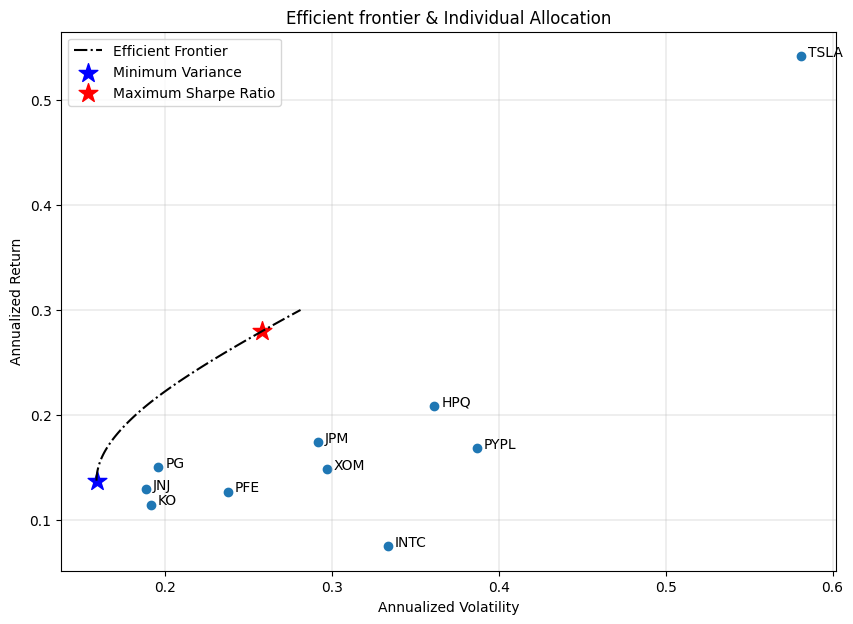

In [83]:
# Gráfica activos individuales y frontera eficiente.
plt.figure(figsize=(10,7))

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Efficient frontier & Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [ ]:
# Juan David Rincón, Mayo 2023.